## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.15, 0.25, 0.35]

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i, drp_rate in enumerate(Dropout_EXP):
    print("Numbers of exp: %i, dropout_rate: %.2f" % (i, drp_rate))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drp_rate)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}


Numbers of exp: 0, dropout_rate: 0.15
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________

Epoch 43/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.2988 - acc: 0.5345 - val_loss: 1.3644 - val_acc: 0.5163
Epoch 44/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.3007 - acc: 0.5337 - val_loss: 1.3564 - val_acc: 0.5195
Epoch 45/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.2881 - acc: 0.5374 - val_loss: 1.3525 - val_acc: 0.5247
Epoch 46/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.2880 - acc: 0.5357 - val_loss: 1.3668 - val_acc: 0.5224
Epoch 47/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.2910 - acc: 0.5382 - val_loss: 1.3397 - val_acc: 0.5265
Epoch 48/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.2824 - acc: 0.5400 - val_loss: 1.3487 - val_acc: 0.5287
Epoch 49/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.2796 - acc: 0.5403 - val_loss: 1.3622 - val_acc: 0.5206
Epoch 50/50
50000/50000 [=========

50000/50000 [==============================] - 2s 42us/step - loss: 1.4862 - acc: 0.4657 - val_loss: 1.4502 - val_acc: 0.4917
Epoch 42/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.4903 - acc: 0.4659 - val_loss: 1.4445 - val_acc: 0.4937
Epoch 43/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.4859 - acc: 0.4655 - val_loss: 1.4557 - val_acc: 0.4851
Epoch 44/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4830 - acc: 0.4668 - val_loss: 1.4345 - val_acc: 0.4885
Epoch 45/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4778 - acc: 0.4675 - val_loss: 1.4583 - val_acc: 0.4883
Epoch 46/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.4751 - acc: 0.4688 - val_loss: 1.4160 - val_acc: 0.4978
Epoch 47/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.4819 - acc: 0.4637 - val_loss: 1.4435 - val_acc: 0.4890
Epoch 48/50
50000/50000 [=====================

Epoch 40/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.6962 - acc: 0.3877 - val_loss: 1.6438 - val_acc: 0.4402
Epoch 41/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.6980 - acc: 0.3839 - val_loss: 1.6361 - val_acc: 0.4285
Epoch 42/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.6981 - acc: 0.3835 - val_loss: 1.6665 - val_acc: 0.4011
Epoch 43/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.6883 - acc: 0.3890 - val_loss: 1.6532 - val_acc: 0.4217
Epoch 44/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.6844 - acc: 0.3901 - val_loss: 1.6402 - val_acc: 0.4325
Epoch 45/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.6835 - acc: 0.3910 - val_loss: 1.6519 - val_acc: 0.4290
Epoch 46/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.6908 - acc: 0.3871 - val_loss: 1.6466 - val_acc: 0.4244
Epoch 47/50
50000/50000 [=========

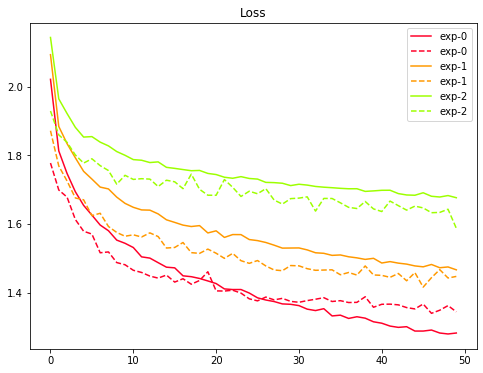

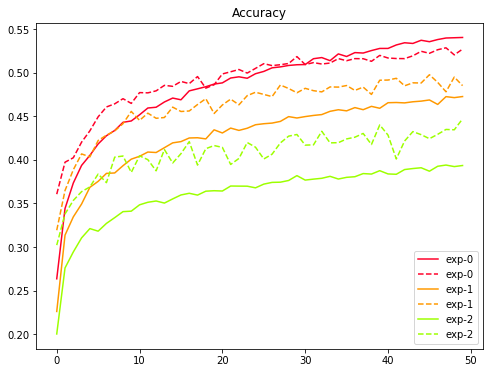

In [14]:
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = 8

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()